## Importing all the required library

In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


# Loading the data

In [87]:
train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

In [88]:
print(f'Shape of the Training data: {train.shape}')
print(f'Shape of the Testing data: {test.shape}')

Shape of the Training data: (159256, 24)
Shape of the Testing data: (106171, 23)


In [89]:
# Analysis the basic data
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [90]:
# Lets see all the columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

## Baisc explortaion

In [91]:
train['smoking'].value_counts(normalize = True)

smoking
0    0.562635
1    0.437365
Name: proportion, dtype: float64

#### Its roughly balanced.

## Missing values

In [92]:
train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

#### There are no null data.

## EDA

#### Lets create some visulalization function 

In [93]:
def plot_histogram(df, hue = None):
    """ To Plot the histogram of the continuous feature"""
    print(f'Datapoint distribution of {df.name}')
    print(df.describe())
    plt.figure(figsize=(10,6))
    sns.displot(x = df, hue = hue, kind='kde', color='red')
    plt.title(f'Datapoint distribution of {df.name}')
    plt.show()
    


def plot_countplot(df, n=100, hue = None ):
    """ To plot bargraph to get the count of each score feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(df, hue = hue,  order=pd.value_counts(df).iloc[:n].index)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df,x=10,y=6):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(x,y))
    plt.title(f'Correlation Matrix')
    sns.heatmap(df.corr(),annot=True)

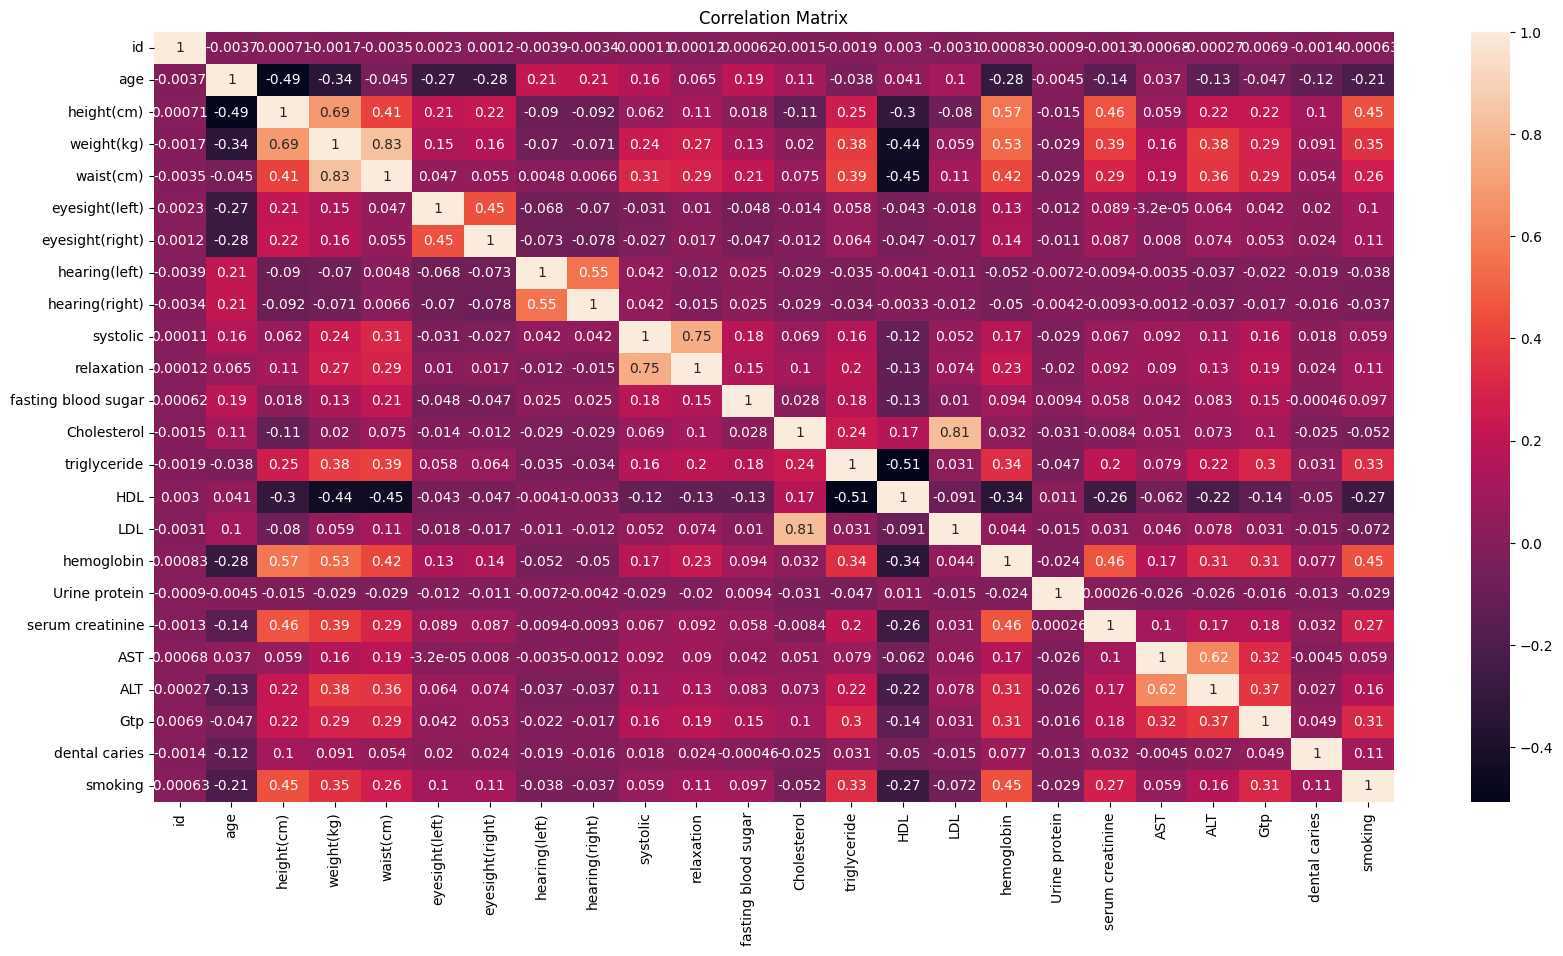

In [94]:
plot_heatmap(train, x = 20, y = 10)

Lets check the data for individual columns

In [95]:
train.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [96]:
cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries']

Datapoint distribution of age
count    159256.000000
mean         44.306626
std          11.842286
min          20.000000
25%          40.000000
50%          40.000000
75%          55.000000
max          85.000000
Name: age, dtype: float64


<Figure size 1000x600 with 0 Axes>

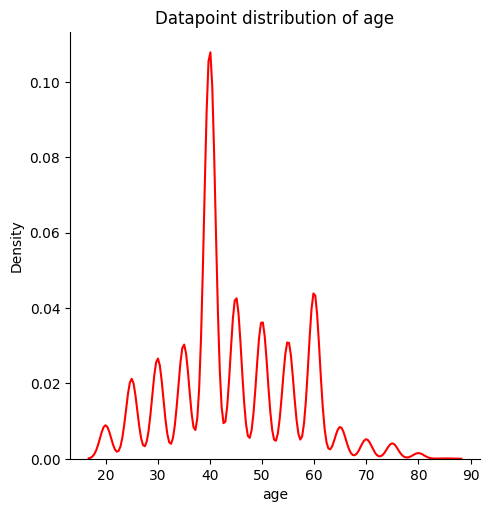


Datapoint distribution of height(cm)
count    159256.000000
mean        165.266929
std           8.818970
min         135.000000
25%         160.000000
50%         165.000000
75%         170.000000
max         190.000000
Name: height(cm), dtype: float64


<Figure size 1000x600 with 0 Axes>

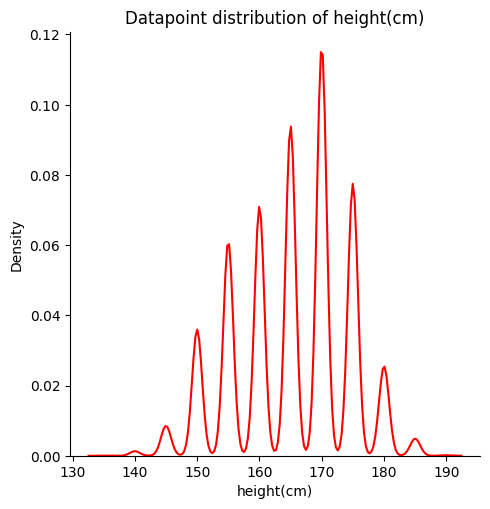


Datapoint distribution of weight(kg)
count    159256.000000
mean         67.143662
std          12.586198
min          30.000000
25%          60.000000
50%          65.000000
75%          75.000000
max         130.000000
Name: weight(kg), dtype: float64


<Figure size 1000x600 with 0 Axes>

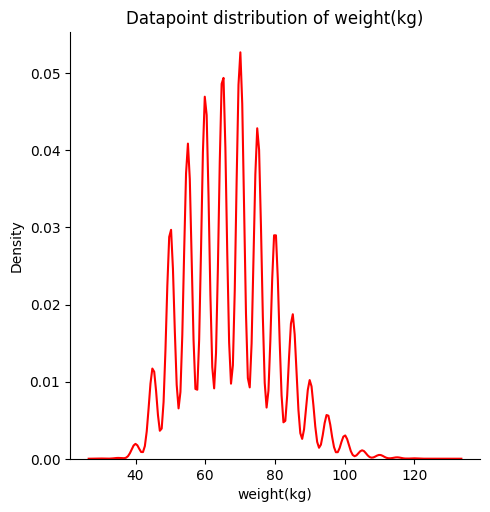


Datapoint distribution of waist(cm)
count    159256.000000
mean         83.001990
std           8.957937
min          51.000000
25%          77.000000
50%          83.000000
75%          89.000000
max         127.000000
Name: waist(cm), dtype: float64


<Figure size 1000x600 with 0 Axes>

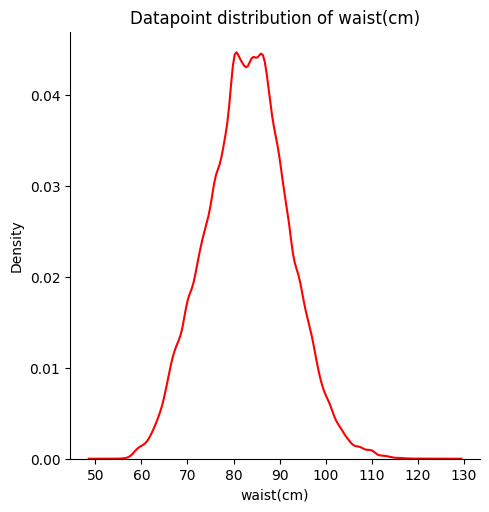


Datapoint distribution of eyesight(left)
count    159256.000000
mean          1.005798
std           0.402113
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           9.900000
Name: eyesight(left), dtype: float64


<Figure size 1000x600 with 0 Axes>

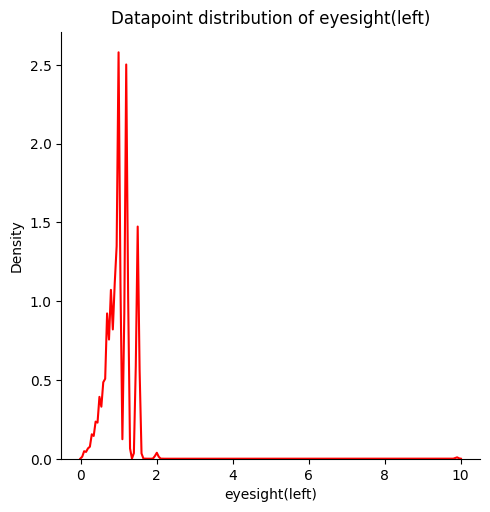


Datapoint distribution of eyesight(right)
count    159256.000000
mean          1.000989
std           0.392299
min           0.100000
25%           0.800000
50%           1.000000
75%           1.200000
max           9.900000
Name: eyesight(right), dtype: float64


<Figure size 1000x600 with 0 Axes>

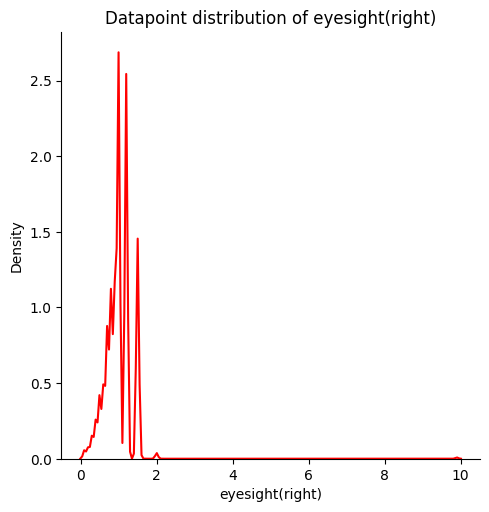


Datapoint distribution of hearing(left)
count    159256.000000
mean          1.023974
std           0.152969
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(left), dtype: float64


<Figure size 1000x600 with 0 Axes>

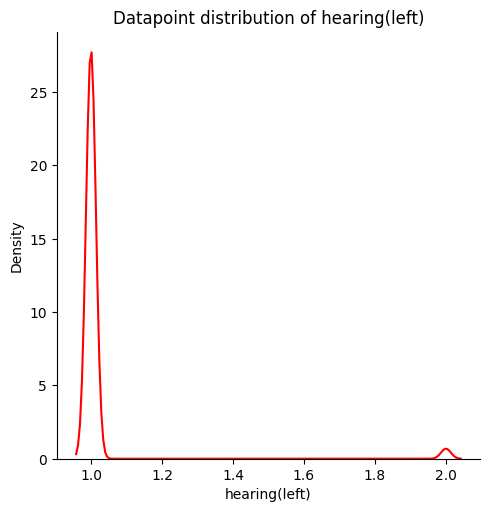


Datapoint distribution of hearing(right)
count    159256.000000
mean          1.023421
std           0.151238
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(right), dtype: float64


<Figure size 1000x600 with 0 Axes>

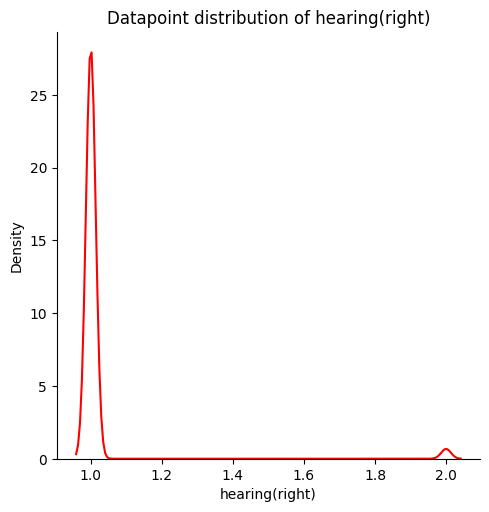


Datapoint distribution of systolic
count    159256.000000
mean        122.503648
std          12.729315
min          77.000000
25%         114.000000
50%         121.000000
75%         130.000000
max         213.000000
Name: systolic, dtype: float64


<Figure size 1000x600 with 0 Axes>

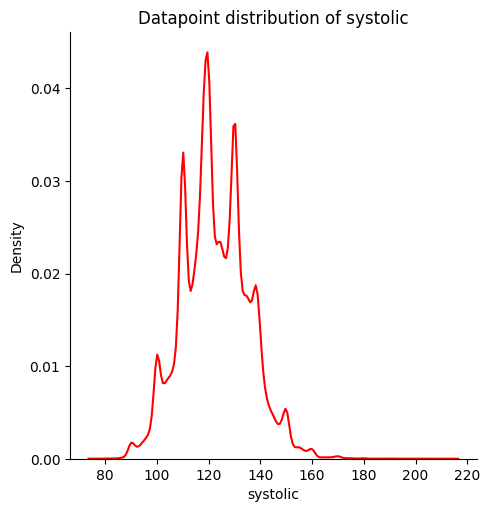


Datapoint distribution of relaxation
count    159256.000000
mean         76.874071
std           8.994642
min          44.000000
25%          70.000000
50%          78.000000
75%          82.000000
max         133.000000
Name: relaxation, dtype: float64


<Figure size 1000x600 with 0 Axes>

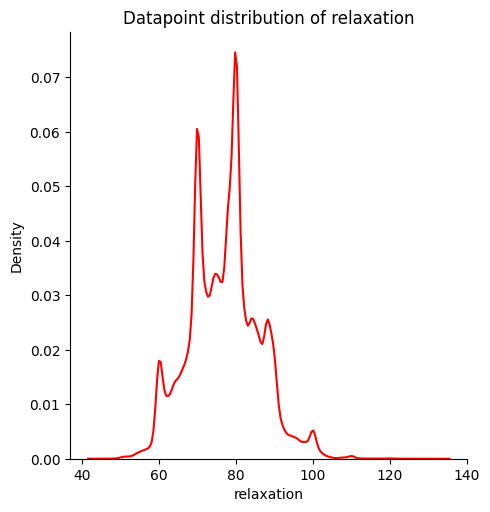


Datapoint distribution of fasting blood sugar
count    159256.000000
mean         98.352552
std          15.329740
min          46.000000
25%          90.000000
50%          96.000000
75%         103.000000
max         375.000000
Name: fasting blood sugar, dtype: float64


<Figure size 1000x600 with 0 Axes>

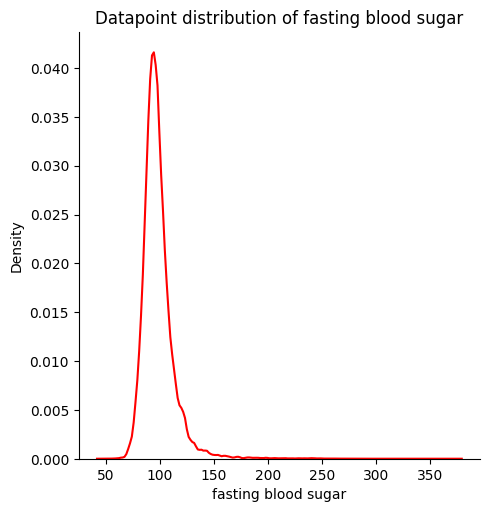


Datapoint distribution of Cholesterol
count    159256.000000
mean        195.796165
std          28.396959
min          77.000000
25%         175.000000
50%         196.000000
75%         217.000000
max         393.000000
Name: Cholesterol, dtype: float64


<Figure size 1000x600 with 0 Axes>

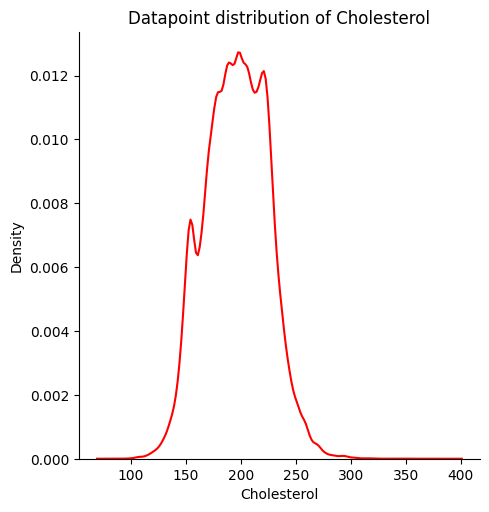


Datapoint distribution of triglyceride
count    159256.000000
mean        127.616046
std          66.188989
min           8.000000
25%          77.000000
50%         115.000000
75%         165.000000
max         766.000000
Name: triglyceride, dtype: float64


<Figure size 1000x600 with 0 Axes>

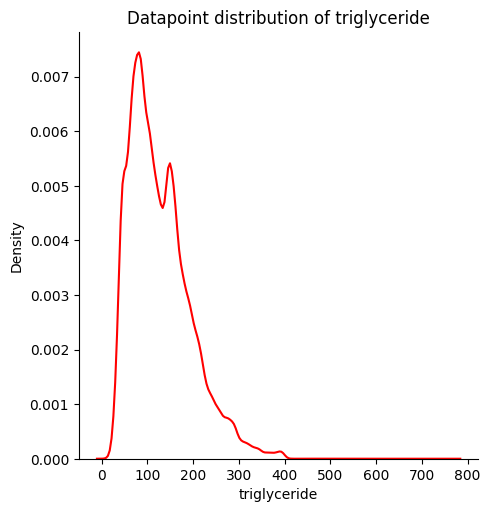


Datapoint distribution of HDL
count    159256.000000
mean         55.852684
std          13.964141
min           9.000000
25%          45.000000
50%          54.000000
75%          64.000000
max         136.000000
Name: HDL, dtype: float64


<Figure size 1000x600 with 0 Axes>

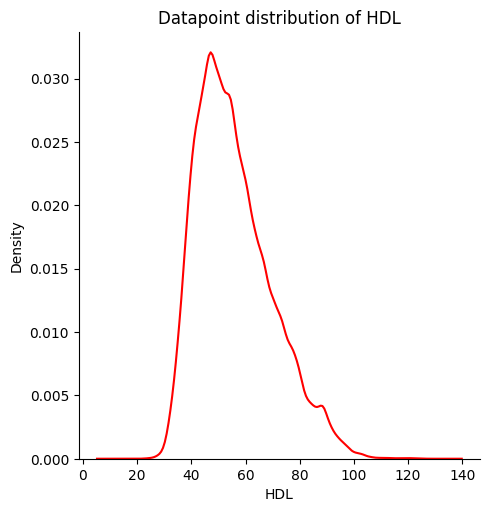


Datapoint distribution of LDL
count    159256.000000
mean        114.607682
std          28.158931
min           1.000000
25%          95.000000
50%         114.000000
75%         133.000000
max        1860.000000
Name: LDL, dtype: float64


<Figure size 1000x600 with 0 Axes>

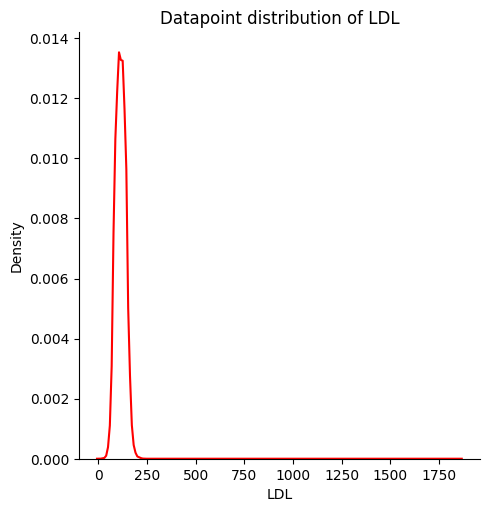


Datapoint distribution of hemoglobin
count    159256.000000
mean         14.796965
std           1.431213
min           4.900000
25%          13.800000
50%          15.000000
75%          15.800000
max          21.000000
Name: hemoglobin, dtype: float64


<Figure size 1000x600 with 0 Axes>

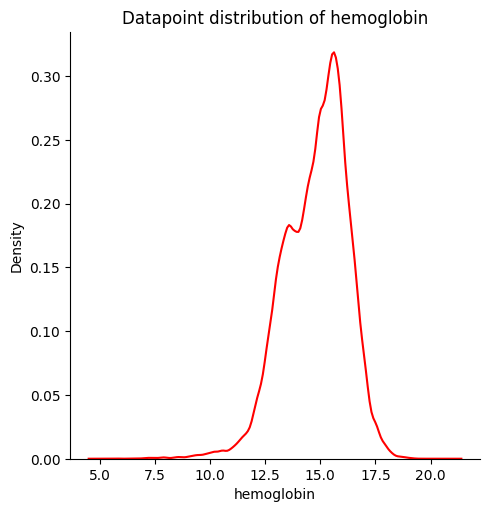


Datapoint distribution of Urine protein
count    159256.000000
mean          1.074233
std           0.347856
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: Urine protein, dtype: float64


<Figure size 1000x600 with 0 Axes>

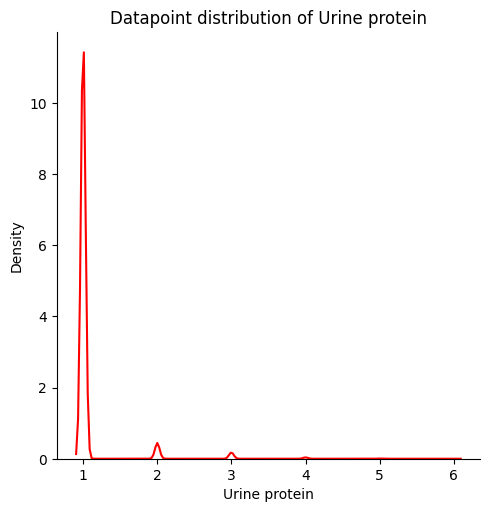


Datapoint distribution of serum creatinine
count    159256.000000
mean          0.892764
std           0.179346
min           0.100000
25%           0.800000
50%           0.900000
75%           1.000000
max           9.900000
Name: serum creatinine, dtype: float64


<Figure size 1000x600 with 0 Axes>

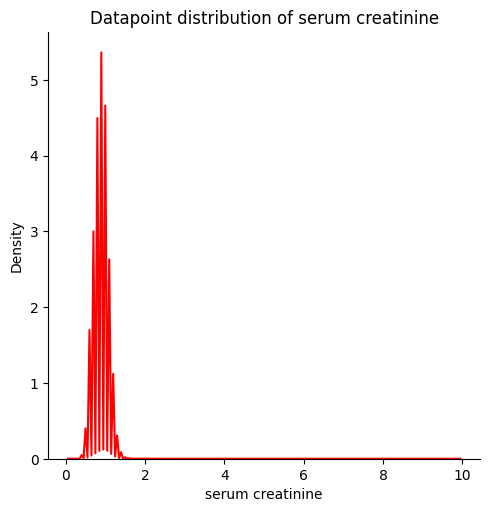


Datapoint distribution of AST
count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64


<Figure size 1000x600 with 0 Axes>

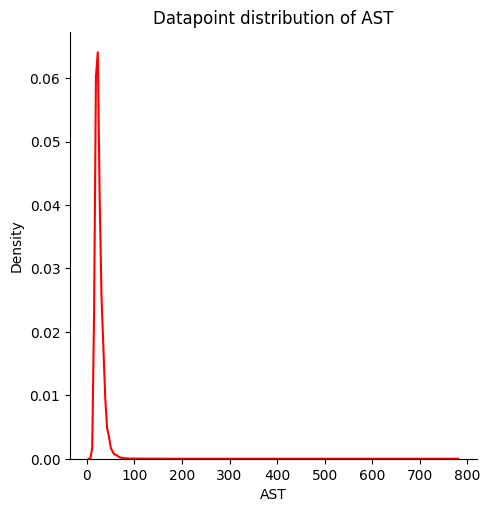


Datapoint distribution of ALT
count    159256.000000
mean         26.550296
std          17.753070
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max        2914.000000
Name: ALT, dtype: float64


<Figure size 1000x600 with 0 Axes>

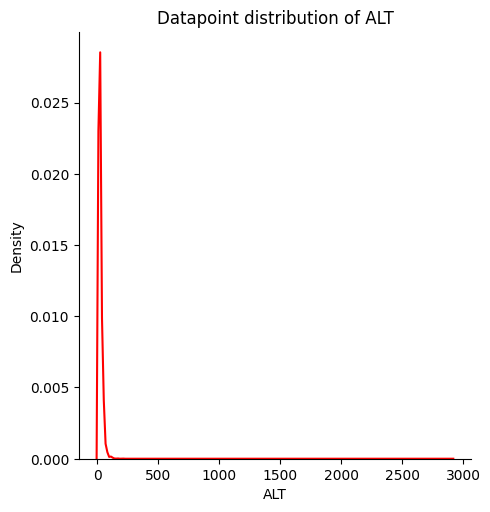


Datapoint distribution of Gtp
count    159256.000000
mean         36.216004
std          31.204643
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64


<Figure size 1000x600 with 0 Axes>

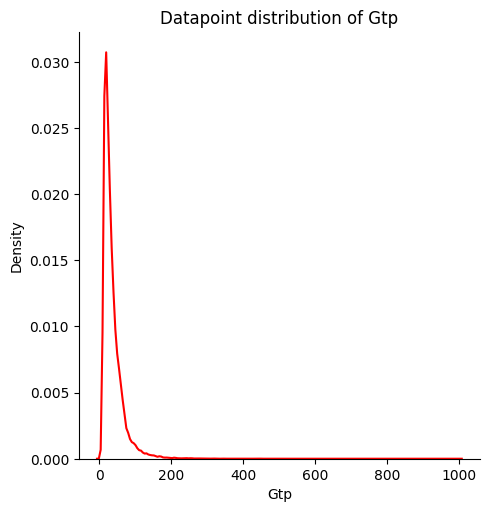


Datapoint distribution of dental caries
count    159256.000000
mean          0.197996
std           0.398490
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: dental caries, dtype: float64


<Figure size 1000x600 with 0 Axes>

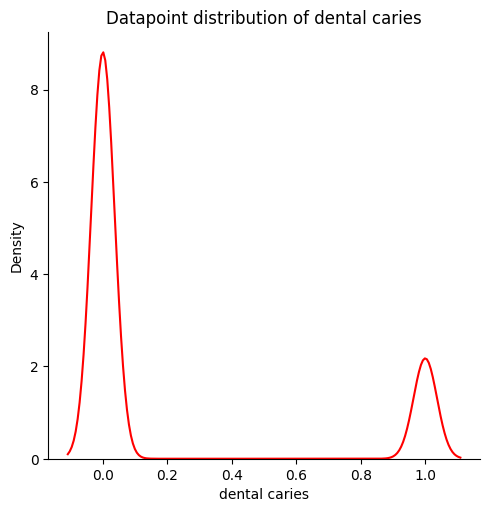

In [97]:
for col in cols:
    plot_histogram(train[col])
    print('=======================\n')

In [98]:
train.skew().sort_values()

hemoglobin             -0.633571
height(cm)             -0.269915
id                      0.000000
Cholesterol             0.043488
waist(cm)               0.072446
relaxation              0.176350
systolic                0.219925
smoking                 0.252532
age                     0.291697
weight(kg)              0.378075
HDL                     0.758884
triglyceride            0.986228
serum creatinine        1.511059
dental caries           1.515762
fasting blood sugar     3.461099
Gtp                     5.414827
Urine protein           5.585562
hearing(left)           6.223920
hearing(right)          6.302437
LDL                     6.874810
eyesight(right)         8.486849
eyesight(left)          8.890572
AST                    11.592346
ALT                    34.830012
dtype: float64

####  Few of these columns are highly skewed, which needs to be corrected.

In [99]:
train[['AST','ALT','eyesight(right)','eyesight(left)']].corr()

,AST,ALT,eyesight(right),eyesight(left)
AST,1.000000,0.623408,0.007967,-0.000032
ALT,0.623408,1.000000,0.073843,0.063819
eyesight(right),0.007967,0.073843,1.000000,0.448945
eyesight(left),-0.000032,0.063819,0.448945,1.000000


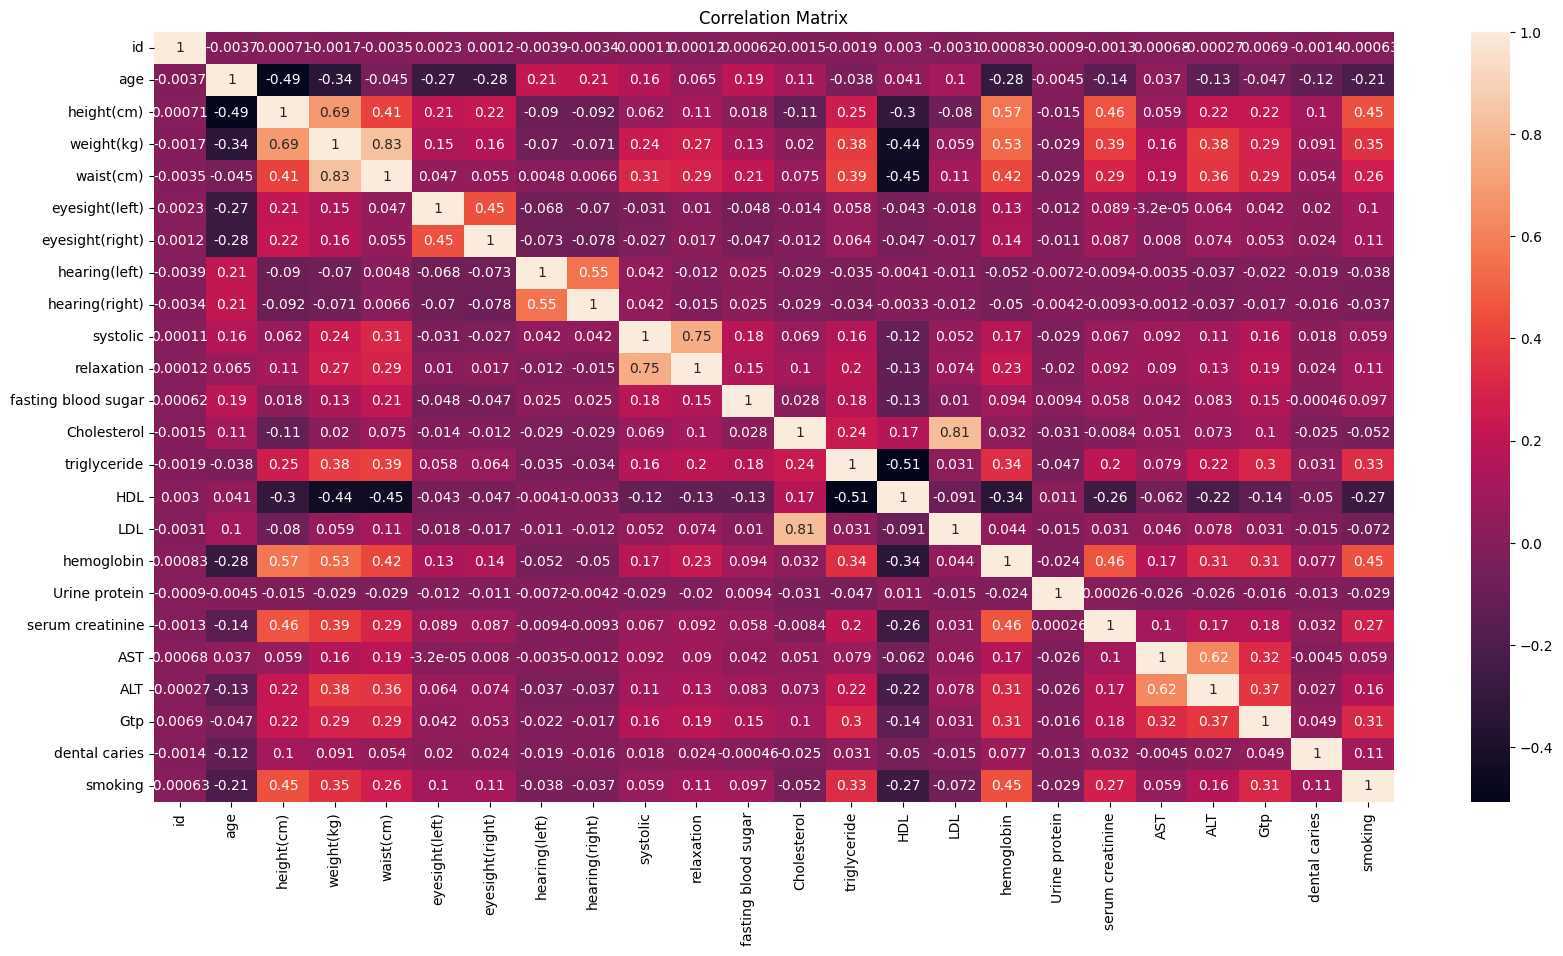

In [100]:
plot_heatmap(train, x = 20, y = 10)

### There are some columns which are highly correlated with each other. These columns can be removed.

1. weight(kg) ~ waist(cm)
2. weight (kg) ~ height(cm)
3. hemoglobin ~ height (cm)
4. systolic ~ relaxation
5. Cholesterol ~ LDL
6. AST ~ ALT

In [101]:
cols_to_drop = ['id', 'weight(kg)', 'hemoglobin','systolic','LDL','AST']

## Data pre-processing

In [102]:
train_mod = train.drop(columns = cols_to_drop)


In [103]:
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [104]:
train_mod = pd.get_dummies(train_mod, columns = ['dental caries'])

In [105]:
X = train_mod[['age', 'height(cm)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
       'hearing(left)', 'hearing(right)', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'Urine protein',
       'serum creatinine', 'ALT', 'Gtp', 'dental caries_0',
       'dental caries_1']]

y = train_mod['smoking']

## Model Building

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

### Randomforest model

In [126]:
clf = RandomForestClassifier()
clf.fit(X_train_scaled,y_train)
y_pred = clf.predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.767710018076301

## Logistic Regression

In [127]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.7353629530967558

### KNN Classifier

In [128]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.7214537151555513

### XGB Classifier

In [129]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
y_pred = xgb.predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.7706593092950242

### LGBM

In [130]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
y_pred = lgbm.predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.7735134620873371